In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("fifa21_training.csv")
data

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,11284,239074,S. Aw,21,Senegal,Gil Vicente FC,LB,LB,Gil Vicente FC 2020 ~ 2023,"5'8""",...,52+2,52+2,58+2,58+2,54+2,54+2,54+2,58+2,15+2,60
13696,11964,241223,S. Mogi,21,Japan,Cerezo Osaka,GK,GK,Cerezo Osaka 2017 ~ 2021,"6'5""",...,23+2,23+2,20+2,20+2,22+2,22+2,22+2,20+2,58+2,59
13697,5390,210930,Carles Gil,27,Spain,New England Revolution,RM,RM CAM CM,New England Revolution 2019 ~ 2024,"5'7""",...,60+2,60+2,62+2,57+2,47+2,47+2,47+2,57+2,18+2,76
13698,860,162993,J. Perch,34,England,Mansfield Town,CDM,CDM RB CM,Mansfield Town 2020 ~ 2021,"5'11""",...,62+1,62+1,60+2,60+2,63+0,63+0,63+0,60+2,14+2,63


In [3]:
"""
To read easier, data was analyzed in excel
"""

data=data.drop(["Unnamed: 0","ID","Name","Nationality","Club","Team & Contract","Joined","Loan Date End","Value","Wage","Release Clause","Contract","Hits","Total Stats","Base Stats"],axis=1)

In [4]:
data

,Age,BP,Position,Height,Weight,foot,Growth,Attacking,Crossing,Finishing,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,26,CM,CM CDM,"5'9""",161lbs,Right,1,258,54,47,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,30,ST,ST LW LM,"6'0""",159lbs,Right,0,365,66,79,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,33,CAM,CAM CF,"5'4""",134lbs,Right,0,336,73,76,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,22,CDM,CDM CM,"5'10""",152lbs,Right,13,242,44,42,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,23,CDM,CDM CM,"5'11""",150lbs,Right,8,249,49,37,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,21,LB,LB,"5'8""",143lbs,Left,11,197,59,23,...,52+2,52+2,58+2,58+2,54+2,54+2,54+2,58+2,15+2,60
13696,21,GK,GK,"6'5""",176lbs,Right,9,77,13,9,...,23+2,23+2,20+2,20+2,22+2,22+2,22+2,20+2,58+2,59
13697,27,RM,RM CAM CM,"5'7""",146lbs,Left,0,332,76,72,...,60+2,60+2,62+2,57+2,47+2,47+2,47+2,57+2,18+2,76
13698,34,CDM,CDM RB CM,"5'11""",176lbs,Right,0,268,58,44,...,62+1,62+1,60+2,60+2,63+0,63+0,63+0,60+2,14+2,63


In [5]:
data=data.drop(("Position"),axis=1)

In [6]:
data

,Age,BP,Height,Weight,foot,Growth,Attacking,Crossing,Finishing,Heading Accuracy,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,26,CM,"5'9""",161lbs,Right,1,258,54,47,43,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,30,ST,"6'0""",159lbs,Right,0,365,66,79,76,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,33,CAM,"5'4""",134lbs,Right,0,336,73,76,34,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,22,CDM,"5'10""",152lbs,Right,13,242,44,42,58,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,23,CDM,"5'11""",150lbs,Right,8,249,49,37,61,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,21,LB,"5'8""",143lbs,Left,11,197,59,23,42,...,52+2,52+2,58+2,58+2,54+2,54+2,54+2,58+2,15+2,60
13696,21,GK,"6'5""",176lbs,Right,9,77,13,9,14,...,23+2,23+2,20+2,20+2,22+2,22+2,22+2,20+2,58+2,59
13697,27,RM,"5'7""",146lbs,Left,0,332,76,72,34,...,60+2,60+2,62+2,57+2,47+2,47+2,47+2,57+2,18+2,76
13698,34,CDM,"5'11""",176lbs,Right,0,268,58,44,61,...,62+1,62+1,60+2,60+2,63+0,63+0,63+0,60+2,14+2,63


In [7]:
data.dtypes

Age        int64
BP        object
Height    object
Weight    object
foot      object
           ...  
CB        object
RCB       object
RB        object
GK        object
OVA        int64
Length: 86, dtype: object

In [8]:
def height_conversion(height):
        feet, inches = height.split("'")
        total_inches = int(feet) * 12 + int(inches.strip('"'))
        return total_inches * 2.54

In [9]:
data["Height(cm)"]=data["Height"].apply(height_conversion)

In [10]:
data

,Age,BP,Height,Weight,foot,Growth,Attacking,Crossing,Finishing,Heading Accuracy,...,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA,Height(cm)
0,26,CM,"5'9""",161lbs,Right,1,258,54,47,43,...,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64,175.26
1,30,ST,"6'0""",159lbs,Right,0,365,66,79,76,...,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77,182.88
2,33,CAM,"5'4""",134lbs,Right,0,336,73,76,34,...,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80,162.56
3,22,CDM,"5'10""",152lbs,Right,13,242,44,42,58,...,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59,177.80
4,23,CDM,"5'11""",150lbs,Right,8,249,49,37,61,...,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65,180.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,21,LB,"5'8""",143lbs,Left,11,197,59,23,42,...,52+2,58+2,58+2,54+2,54+2,54+2,58+2,15+2,60,172.72
13696,21,GK,"6'5""",176lbs,Right,9,77,13,9,14,...,23+2,20+2,20+2,22+2,22+2,22+2,20+2,58+2,59,195.58
13697,27,RM,"5'7""",146lbs,Left,0,332,76,72,34,...,60+2,62+2,57+2,47+2,47+2,47+2,57+2,18+2,76,170.18
13698,34,CDM,"5'11""",176lbs,Right,0,268,58,44,61,...,62+1,60+2,60+2,63+0,63+0,63+0,60+2,14+2,63,180.34


In [11]:
data=data.drop(["Height"],axis=1)
data

,Age,BP,Weight,foot,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA,Height(cm)
0,26,CM,161lbs,Right,1,258,54,47,43,70,...,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64,175.26
1,30,ST,159lbs,Right,0,365,66,79,76,68,...,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77,182.88
2,33,CAM,134lbs,Right,0,336,73,76,34,78,...,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80,162.56
3,22,CDM,152lbs,Right,13,242,44,42,58,62,...,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59,177.80
4,23,CDM,150lbs,Right,8,249,49,37,61,68,...,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65,180.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,21,LB,143lbs,Left,11,197,59,23,42,51,...,52+2,58+2,58+2,54+2,54+2,54+2,58+2,15+2,60,172.72
13696,21,GK,176lbs,Right,9,77,13,9,14,34,...,23+2,20+2,20+2,22+2,22+2,22+2,20+2,58+2,59,195.58
13697,27,RM,146lbs,Left,0,332,76,72,34,79,...,60+2,62+2,57+2,47+2,47+2,47+2,57+2,18+2,76,170.18
13698,34,CDM,176lbs,Right,0,268,58,44,61,62,...,62+1,60+2,60+2,63+0,63+0,63+0,60+2,14+2,63,180.34


In [12]:
data['Weight'] = data['Weight'].str.replace("lbs","")
data['Weight'] = pd.to_numeric(data['Weight'], errors='coerce')
data.dtypes

Age             int64
BP             object
Weight          int64
foot           object
Growth          int64
               ...   
RCB            object
RB             object
GK             object
OVA             int64
Height(cm)    float64
Length: 86, dtype: object

In [13]:
data["W/F"]=data["W/F"].str.replace(" ★","")
data['W/F'] = pd.to_numeric(data['W/F'], errors='coerce')

data['W/F'].value_counts()

3    8436
2    2717
4    2217
5     236
1      94
Name: W/F, dtype: int64

In [14]:
data["SM"]=data["SM"].str.replace("★","")
data['SM'] = pd.to_numeric(data['SM'], errors='coerce')

data['SM'].value_counts()

2    6004
3    5313
1    1323
4    1006
5      54
Name: SM, dtype: int64

In [15]:
data["IR"]=data["IR"].str.replace(" ★","")
data['IR'] = pd.to_numeric(data['IR'], errors='coerce')

data['IR'].value_counts()

1    12118
2     1181
3      339
4       55
5        7
Name: IR, dtype: int64

In [16]:
data=data.drop(["LS","ST","RS","LW","LF","CF","RF","RW","LAM","CAM","RAM","LM","LCM","CM","RCM","RM","LWB","LDM","CDM","RDM","RWB","LB","LCB","CB","RCB","RB","GK"],axis=1)

In [17]:
data

,Age,BP,Weight,foot,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,OVA,Height(cm)
0,26,CM,161,Right,1,258,54,47,43,70,...,Medium,1,69,51,63,63,51,60,64,175.26
1,30,ST,159,Right,0,365,66,79,76,68,...,Low,2,83,75,68,82,33,71,77,182.88
2,33,CAM,134,Right,0,336,73,76,34,78,...,Medium,2,80,77,78,86,27,56,80,162.56
3,22,CDM,152,Right,13,242,44,42,58,62,...,Medium,1,57,44,54,57,57,60,59,177.80
4,23,CDM,150,Right,8,249,49,37,61,68,...,Medium,1,66,44,60,64,60,66,65,180.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,21,LB,143,Left,11,197,59,23,42,51,...,Medium,1,76,28,46,55,53,57,60,172.72
13696,21,GK,176,Right,9,77,13,9,14,34,...,Medium,1,60,55,57,62,30,54,59,195.58
13697,27,RM,146,Left,0,332,76,72,34,79,...,Medium,2,65,69,78,77,39,60,76,170.18
13698,34,CDM,176,Right,0,268,58,44,61,62,...,Medium,1,53,47,58,58,61,69,63,180.34


In [18]:
data_num = data.select_dtypes(include=['float64', 'int64'])
data_cat = data.select_dtypes(include=['object'])

In [19]:
data_num.describe()

,Age,Weight,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,...,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,OVA,Height(cm)
count,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13656.000000,13700.000000,...,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000
mean,25.286058,165.642190,5.509927,258.313431,51.585766,47.996934,53.460292,60.427956,44.986965,266.382993,...,2.449927,1.149781,68.108832,55.056423,58.931679,64.236277,50.123577,64.860219,66.945912,181.225848
std,4.944498,15.810987,5.797176,72.412379,17.899930,19.411530,17.010578,13.975634,17.760924,77.062358,...,0.781784,0.455049,11.183342,13.839958,10.159851,9.816203,16.815110,9.736964,6.860189,6.893956
min,16.000000,117.000000,-1.000000,33.000000,6.000000,3.000000,5.000000,8.000000,4.000000,43.000000,...,1.000000,1.000000,26.000000,17.000000,25.000000,28.000000,12.000000,27.000000,38.000000,154.940000
25%,21.000000,154.000000,0.000000,231.000000,41.000000,33.000000,45.000000,56.000000,32.000000,232.000000,...,2.000000,1.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000,62.000000,175.260000
50%,25.000000,165.000000,4.000000,271.000000,56.000000,52.000000,56.000000,63.000000,47.000000,279.000000,...,2.000000,1.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000,67.000000,180.340000
75%,29.000000,176.000000,9.000000,306.000000,65.000000,64.000000,65.000000,69.000000,59.000000,319.000000,...,3.000000,1.000000,75.000000,65.000000,66.000000,71.000000,64.000000,72.000000,72.000000,185.420000
max,47.000000,243.000000,26.000000,437.000000,94.000000,95.000000,93.000000,94.000000,90.000000,470.000000,...,5.000000,5.000000,96.000000,93.000000,93.000000,95.000000,90.000000,93.000000,93.000000,205.740000


In [20]:
target=data_num["OVA"]
data_columns=data_num.drop("OVA",axis=1)

def log_transf(x):
    if (x != 0): 
        return np.log(x)
    else: 
        return 0

for col in data_columns:
    data_columns[col] = data_columns[col].apply(log_transf)

In [21]:
data_num=pd.concat([data_columns,target],axis=1)
data_num

,Age,Weight,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,...,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,Height(cm),OVA
0,3.258097,5.081404,0.000000,5.552960,3.988984,3.850148,3.761200,4.248495,3.784190,5.655992,...,0.693147,0.000000,4.234107,3.931826,4.143135,4.143135,3.931826,4.094345,5.166271,64
1,3.401197,5.068904,0.000000,5.899897,4.189655,4.369448,4.330733,4.219508,4.330733,5.926926,...,1.386294,0.693147,4.418841,4.317488,4.219508,4.406719,3.496508,4.262680,5.208830,77
2,3.496508,4.897840,0.000000,5.817111,4.290459,4.330733,3.526361,4.356709,4.317488,6.049733,...,1.386294,0.693147,4.382027,4.343805,4.356709,4.454347,3.295837,4.025352,5.091047,80
3,3.091042,5.023881,2.564949,5.488938,3.784190,3.737670,4.060443,4.127134,3.583519,5.556828,...,0.693147,0.000000,4.043051,3.784190,3.988984,4.043051,4.043051,4.094345,5.180659,59
4,3.135494,5.010635,2.079442,5.517453,3.891820,3.610918,4.110874,4.219508,3.526361,5.634790,...,1.098612,0.000000,4.189655,3.784190,4.094345,4.158883,4.094345,4.189655,5.194844,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,3.044522,4.962845,2.397895,5.283204,4.077537,3.135494,3.737670,3.931826,3.091042,5.332719,...,0.693147,0.000000,4.330733,3.332205,3.828641,4.007333,3.970292,4.043051,5.151672,60
13696,3.044522,5.170484,2.197225,4.343805,2.564949,2.197225,2.639057,3.526361,1.945910,4.248495,...,0.000000,0.000000,4.094345,4.007333,4.043051,4.127134,3.401197,3.988984,5.275970,59
13697,3.295837,4.983607,0.000000,5.805135,4.330733,4.276666,3.526361,4.369448,4.262680,5.921578,...,1.386294,0.693147,4.174387,4.234107,4.356709,4.343805,3.663562,4.094345,5.136857,76
13698,3.526361,5.170484,0.000000,5.590987,4.060443,3.784190,4.110874,4.127134,3.761200,5.564520,...,0.693147,0.000000,3.970292,3.850148,4.060443,4.060443,4.110874,4.234107,5.194844,63


In [22]:
data_cat

,BP,foot,A/W,D/W
0,CM,Right,High,Medium
1,ST,Right,High,Low
2,CAM,Right,High,Medium
3,CDM,Right,Medium,Medium
4,CDM,Right,Low,Medium
...,...,...,...,...
13695,LB,Left,High,Medium
13696,GK,Right,Medium,Medium
13697,RM,Left,High,Medium
13698,CDM,Right,Medium,Medium


In [23]:
for i in data_cat:
    data_cat[i].nunique()
    print(i,"-",data_cat[i].nunique())

BP - 15
foot - 2
A/W - 3
D/W - 3


In [24]:
ordinal_map = {'Low':0, 'Medium':1, 'High':2}
data_cat["A/W"] = data_cat["A/W"].map(ordinal_map)
data_cat

,BP,foot,A/W,D/W
0,CM,Right,2.0,Medium
1,ST,Right,2.0,Low
2,CAM,Right,2.0,Medium
3,CDM,Right,1.0,Medium
4,CDM,Right,0.0,Medium
...,...,...,...,...
13695,LB,Left,2.0,Medium
13696,GK,Right,1.0,Medium
13697,RM,Left,2.0,Medium
13698,CDM,Right,1.0,Medium


In [25]:
le = LabelEncoder()
data_cat['BP'] = le.fit_transform(data_cat['BP'])
data_cat

,BP,foot,A/W,D/W
0,4,Right,2.0,Medium
1,14,Right,2.0,Low
2,0,Right,2.0,Medium
3,2,Right,1.0,Medium
4,2,Right,0.0,Medium
...,...,...,...,...
13695,6,Left,2.0,Medium
13696,5,Right,1.0,Medium
13697,11,Left,2.0,Medium
13698,2,Right,1.0,Medium


In [26]:
ordinal_map = {'Low':0, 'Medium':1, 'High':2}
data_cat["D/W"] = data_cat["D/W"].map(ordinal_map)
data_cat

,BP,foot,A/W,D/W
0,4,Right,2.0,1.0
1,14,Right,2.0,0.0
2,0,Right,2.0,1.0
3,2,Right,1.0,1.0
4,2,Right,0.0,1.0
...,...,...,...,...
13695,6,Left,2.0,1.0
13696,5,Right,1.0,1.0
13697,11,Left,2.0,1.0
13698,2,Right,1.0,1.0


In [27]:
data_one=data_cat[["foot"]]
data_enc=data_cat.drop(data_one,axis=1)

In [28]:
data_enc

,BP,A/W,D/W
0,4,2.0,1.0
1,14,2.0,0.0
2,0,2.0,1.0
3,2,1.0,1.0
4,2,0.0,1.0
...,...,...,...
13695,6,2.0,1.0
13696,5,1.0,1.0
13697,11,2.0,1.0
13698,2,1.0,1.0


In [29]:
encoder = OneHotEncoder(drop='first')
data_one_encoded = encoder.fit_transform(data_one)
data_one = pd.DataFrame(data_one_encoded.toarray(), columns=encoder.get_feature_names(data_one.columns))
data_one

,foot_Right
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
13695,0.0
13696,1.0
13697,0.0
13698,1.0


In [30]:
data = pd.concat([data_one, data_enc, data_num], axis=1)

In [31]:
data

,foot_Right,BP,A/W,D/W,Age,Weight,Growth,Attacking,Crossing,Finishing,...,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,Height(cm),OVA
0,1.0,4,2.0,1.0,3.258097,5.081404,0.000000,5.552960,3.988984,3.850148,...,0.693147,0.000000,4.234107,3.931826,4.143135,4.143135,3.931826,4.094345,5.166271,64
1,1.0,14,2.0,0.0,3.401197,5.068904,0.000000,5.899897,4.189655,4.369448,...,1.386294,0.693147,4.418841,4.317488,4.219508,4.406719,3.496508,4.262680,5.208830,77
2,1.0,0,2.0,1.0,3.496508,4.897840,0.000000,5.817111,4.290459,4.330733,...,1.386294,0.693147,4.382027,4.343805,4.356709,4.454347,3.295837,4.025352,5.091047,80
3,1.0,2,1.0,1.0,3.091042,5.023881,2.564949,5.488938,3.784190,3.737670,...,0.693147,0.000000,4.043051,3.784190,3.988984,4.043051,4.043051,4.094345,5.180659,59
4,1.0,2,0.0,1.0,3.135494,5.010635,2.079442,5.517453,3.891820,3.610918,...,1.098612,0.000000,4.189655,3.784190,4.094345,4.158883,4.094345,4.189655,5.194844,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,0.0,6,2.0,1.0,3.044522,4.962845,2.397895,5.283204,4.077537,3.135494,...,0.693147,0.000000,4.330733,3.332205,3.828641,4.007333,3.970292,4.043051,5.151672,60
13696,1.0,5,1.0,1.0,3.044522,5.170484,2.197225,4.343805,2.564949,2.197225,...,0.000000,0.000000,4.094345,4.007333,4.043051,4.127134,3.401197,3.988984,5.275970,59
13697,0.0,11,2.0,1.0,3.295837,4.983607,0.000000,5.805135,4.330733,4.276666,...,1.386294,0.693147,4.174387,4.234107,4.356709,4.343805,3.663562,4.094345,5.136857,76
13698,1.0,2,1.0,1.0,3.526361,5.170484,0.000000,5.590987,4.060443,3.784190,...,0.693147,0.000000,3.970292,3.850148,4.060443,4.060443,4.110874,4.234107,5.194844,63


In [32]:
data

,foot_Right,BP,A/W,D/W,Age,Weight,Growth,Attacking,Crossing,Finishing,...,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,Height(cm),OVA
0,1.0,4,2.0,1.0,3.258097,5.081404,0.000000,5.552960,3.988984,3.850148,...,0.693147,0.000000,4.234107,3.931826,4.143135,4.143135,3.931826,4.094345,5.166271,64
1,1.0,14,2.0,0.0,3.401197,5.068904,0.000000,5.899897,4.189655,4.369448,...,1.386294,0.693147,4.418841,4.317488,4.219508,4.406719,3.496508,4.262680,5.208830,77
2,1.0,0,2.0,1.0,3.496508,4.897840,0.000000,5.817111,4.290459,4.330733,...,1.386294,0.693147,4.382027,4.343805,4.356709,4.454347,3.295837,4.025352,5.091047,80
3,1.0,2,1.0,1.0,3.091042,5.023881,2.564949,5.488938,3.784190,3.737670,...,0.693147,0.000000,4.043051,3.784190,3.988984,4.043051,4.043051,4.094345,5.180659,59
4,1.0,2,0.0,1.0,3.135494,5.010635,2.079442,5.517453,3.891820,3.610918,...,1.098612,0.000000,4.189655,3.784190,4.094345,4.158883,4.094345,4.189655,5.194844,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,0.0,6,2.0,1.0,3.044522,4.962845,2.397895,5.283204,4.077537,3.135494,...,0.693147,0.000000,4.330733,3.332205,3.828641,4.007333,3.970292,4.043051,5.151672,60
13696,1.0,5,1.0,1.0,3.044522,5.170484,2.197225,4.343805,2.564949,2.197225,...,0.000000,0.000000,4.094345,4.007333,4.043051,4.127134,3.401197,3.988984,5.275970,59
13697,0.0,11,2.0,1.0,3.295837,4.983607,0.000000,5.805135,4.330733,4.276666,...,1.386294,0.693147,4.174387,4.234107,4.356709,4.343805,3.663562,4.094345,5.136857,76
13698,1.0,2,1.0,1.0,3.526361,5.170484,0.000000,5.590987,4.060443,3.784190,...,0.693147,0.000000,3.970292,3.850148,4.060443,4.060443,4.110874,4.234107,5.194844,63


In [33]:
total_na = data.isna().sum().sum()
print("Total NaN values:", total_na)

Total NaN values: 786


In [34]:
data = data.dropna()

In [47]:
#Split Test Data

X = data.drop('OVA', axis=1)
y = data['OVA']

#Train Model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=195)

lm=linear_model.LinearRegression().fit(X_train,y_train)

predictions=lm.predict(X_test)
predictions

r2=r2_score(y_test,predictions)
mean_squared=mean_squared_error(y_test,predictions)
root_mean_squared = np.sqrt(mean_squared)
mean_absolute=mean_absolute_error(y_test,predictions)

print(r2)
print(mean_squared)
print(root_mean_squared)
print(mean_absolute)

0.9036140622580879
4.480126900191413
2.116631025991874
1.6414655896810189


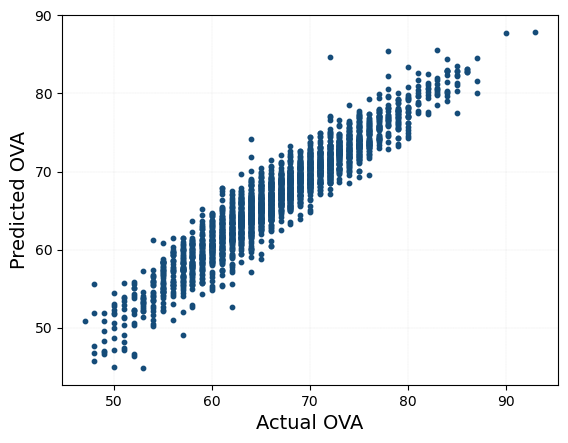

In [36]:
plt.scatter(y_test, predictions, s=10, alpha=1, color="#154c79")
plt.grid(color='gray', linestyle='--', linewidth=0.1, alpha=0.7)
plt.xlabel('Actual OVA',fontsize=14)
plt.ylabel('Predicted OVA',fontsize=14)
plt.savefig("Fifa.png", dpi=100)
plt.show()

In [37]:
metrics={"R2 Score": r2,
         "Mean Squared Error": mean_squared,
         "Root Mean Squared": root_mean_squared,
         "Mean Absolute": mean_absolute}

data_metrics= pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])
data_metrics

,Metric,Value
0,R2 Score,0.903614
1,Mean Squared Error,4.480127
2,Root Mean Squared,2.116631
3,Mean Absolute,1.641466


<AxesSubplot:>

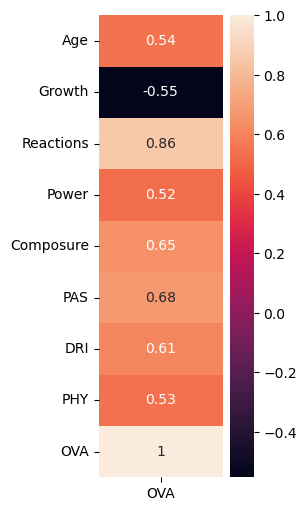

In [45]:
corr_matrix = data.corr()[["OVA"]]
corr_matrix_filtered = corr_matrix[abs(corr_matrix["OVA"]) >= 0.5]
plt.figure(figsize=(2, 6))
sns.heatmap(corr_matrix_filtered, annot=True)